# Appendix A. Sample calculations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#part 1
#displacement
d=[15.5*1000,
  15.7*1000,
  15.7*1000,
  16.0*1000,
  15.9*1000]

#error in displacement
e_d=0.5*1000

#part 2
#number of fringed counted
N=[0]+[x for x in range(4,15,2)]

#variation of pressure between counts
dp=[0,
   24-10,
   32-10,
   40-10,
   48-10,
   56-10,
   64-10]

#erro in pressure
e_dp=1

#length of vacuum cell
l=3.0

#atmospheric pressure
p=76

# part 1

In [3]:
wavelength=lambda d: 2*d/50

In [4]:
#derived wavelengths
wl=[]
for i in range(len(d)):
    wl.append(wavelength(d[i]))

print(wl)
print('average lambda:',np.mean(wl),'nm')

#error propagation
s_wl=2*e_d/50
print('experimental uncertainty:',s_wl)

s=np.std(wl)
print('standard deviation:', s)
print('standard error=',s/np.sqrt(len(wl)))

print('experimentally determined wavelength: 630(3) nm')

#accepted value of wavelength
wl_ex=632.8

#percent error
diff_wl=np.abs(np.mean(wl)-wl_ex)/wl_ex*100
print('percent error:',diff_wl,'%')

[620.0, 628.0, 628.0, 640.0, 636.0]
average lambda: 630.4 nm
experimental uncertainty: 20.0
standard deviation: 6.974238309665077
standard error= 3.118974190338868
experimentally determined wavelength: 630(3) nm
percent error: 0.3792667509481633 %


# Part 2

In [22]:
#defining useful function to do least-square fitting
def delta(x):
    return len(x)*sum(i*i for i in x)-(sum(x))**2
def intercept(x,y,delta):
    return ((sum(i*i for i in x))*sum(y)-sum(x)*sum(map(lambda a,b:a*b,x,y)))/delta
def slope(x,y,delta):
    return (len(x)*sum(map(lambda a,b:a*b,x,y))-sum(x)*sum(y))/delta
def acu(y,m,x,c):
    return np.sqrt((1/(len(x)-2))*sum(map(lambda a,b:(b-m*a-c)**2, x,y)))
def am(acu,x,delta):
    return acu*np.sqrt(len(x)/delta)
def ac(acu,x,delta):
    return acu*np.sqrt(sum(i*i for i in x)/delta)

def aslope(n,p): #with function forced to b=0
    return sum(map(lambda a,b: a*b, n,p))/sum(i*i for i in p)

In [24]:
#calculating parameters and their errors
dx=delta(dp)
print(dx)
m=slope(dp,N,dx)
print('slope:',m)
c=intercept(dp,N,dx)
print('intercept:',c)
cu=acu(N,m,dp,c)
print(cu)
error_slope=am(cu,dp,dx)
print('error in gradient:',error_slope)
error_intercept=ac(cu,dp,dx)
print('error in the intercept:',error_intercept)

mm=aslope(N,dp) #for b=0
print(mm)

14776
slope: 0.25690308608554413
intercept: 0.2273957769355712
0.15079647772264818
error in gradient: 0.003282175325658404
error in the intercept: 0.11134545262349385
0.26266137040714993


In [29]:
coef=[m,c]
yfit=np.polyval(coef,dp) #fit line
res=N-yfit #redisuals
chi2=sum(i*i for i in res)/((1/(len(dp)-2))*sum(i*i for i in res))#chi square
print('chi^2=',chi2)

#for b=0
ayfit=np.polyval([mm,0],dp)#[mm*i for i in dp]
ares=N-ayfit

chi^2= 4.999999999999999


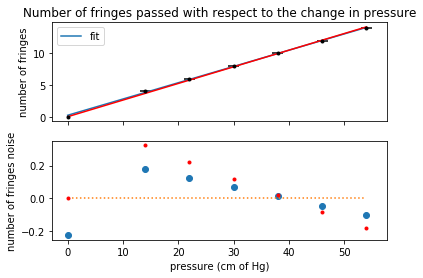

In [31]:
f,ax=plt.subplots(2,sharex=True)
ax[0].errorbar(dp,N,xerr=[0]+([e_dp]*(len(dp)-1)),fmt='.k')
ax[0].plot(dp,yfit,label='fit')
ax[0].plot(dp,ayfit,'r-')#for b=0

ax[1].plot(dp,res,'o')
ax[1].plot(dp,[0]*len(dp),":")
ax[1].plot(dp,ares,'r.')#for b=0

ax[0].set_title('Number of fringes passed with respect to the change in pressure')
plt.xlabel('pressure (cm of Hg)')
ax[0].set_ylabel('number of fringes')
ax[1].set_ylabel('number of fringes noise')
ax[0].legend()
plt.savefig('fig.jpg')
plt.show()

In [9]:
#calculating experimental refractive index
n=coef[0]*wl_ex/10**7/(2*l)*p+1
print('experimental result=',n)

#error propagation
s_n=error_slope*wl_ex/10**7/(2*l)*p
print('uncertainty:',s_n)

#accepted value
n_air=1.000263

print('refractive index of air at atmospheric pressure= 1.000205(3)')

#percent error
diff_n=(np.abs(n-n_air))/n_air*100
print('percent error:',diff_n,'%')

experimental result= 1.0002059198123083
uncertainty: 2.6308166916970746e-06
refractive index of air at atmospheric pressure= 1.000205(3)
percent error: 0.005706517954935016 %


In [10]:
print('the accepted value of n is within',(n_air-n)/s_n,'standard deviation')
print('relative uncertainty of n:',s_n/n*100,'%')

the accepted value of n is within 21.69675594339894 standard deviation
relative uncertainty of n: 0.00026302750659491753 %
